# - 8px - RGB -

In [8]:
import matplotlib.pyplot as plt
from img_driver import Img_Driver
from datetime import datetime
import numpy as np
import random
import time
import sys
import os

## Linear Asian

In [9]:
driver = Img_Driver()

X = driver.pixels_rgb(8, rgb=True, divider=255)
Y = driver.define_y_linear("asian", 8, rgb=True)

X_test = driver.pixels_rgb(8, rgb=True, divider=255, test=True)
Y_test = driver.define_y_linear("asian", 8, rgb=True, test=True)

# X_test = driver.pixels_rgb(8, rgb=False, divider=255, test=True)
# Y_test = [1.0 if x < 80 else 0.0 for x in range(240)]

random.seed(0)
random.shuffle(X)
random.seed(0)
random.shuffle(Y)

print(f"X : {len(X)} {len(X[0])}")
print(X[0:1])
print()
print(f"Y : {len(Y)}")
print(Y[0:1])
print()
# print(f"X_test : {len(X_test)} {len(X_test[0])}")
# print(X_test[0:1])
# print()
# print(f"Y_test : {len(Y_test)}")
# print(Y_test)
# print()

X : 4528 192
[[0.9019607843137255, 0.9333333333333333, 0.996078431372549, 0.9294117647058824, 0.9568627450980393, 1.0, 0.9647058823529412, 0.9803921568627451, 1.0, 0.9803921568627451, 0.996078431372549, 1.0, 0.9803921568627451, 0.996078431372549, 1.0, 0.9607843137254902, 0.9803921568627451, 1.0, 0.9411764705882353, 0.9647058823529412, 1.0, 0.9176470588235294, 0.9490196078431372, 1.0, 0.9137254901960784, 0.9450980392156862, 1.0, 0.9529411764705882, 0.9764705882352941, 1.0, 0.9333333333333333, 0.9450980392156862, 0.9647058823529412, 0.7372549019607844, 0.7607843137254902, 0.788235294117647, 0.7254901960784313, 0.7450980392156863, 0.7725490196078432, 0.9137254901960784, 0.9294117647058824, 0.9490196078431372, 0.9529411764705882, 0.9764705882352941, 1.0, 0.9215686274509803, 0.9529411764705882, 1.0, 0.803921568627451, 0.8274509803921568, 0.8588235294117647, 0.9215686274509803, 0.9372549019607843, 0.9490196078431372, 0.788235294117647, 0.803921568627451, 0.8156862745098039, 0.6, 0.6274509803

### 1

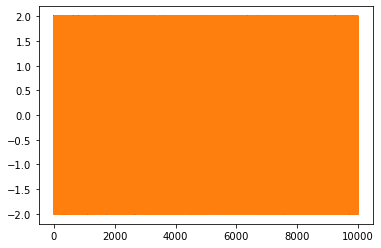

1202.8311972618103


In [7]:
from ruster_linear import Ruster_Linear
r = Ruster_Linear(path="C:\\Users\\Revive\\PycharmProjects\\Rust_Native_ML\\rust\\PerceptronLib\\target\\release\\PerceptronLib.dll")
t1 = time.time()

model_size = 192
model = r.create_linear_model(model_size)

model_np = r.npify(model, model_size+1)
# print(model_np)
print()

XF = [item for sublist in X for item in sublist]
YF = Y

losses = []
test_losses = []

for i in range(10000):
    rand_idx = random.randint(0, len(X)-1)
    rand_idx_test = random.randint(0, len(X_test)-1)
    predict = r.predict_linear_model_classification(model, X[rand_idx], (model_size+1))
    predict_test = r.predict_linear_model_classification(model, X_test[rand_idx_test], (model_size+1))
    
    losses.append(Y[rand_idx] - predict)
    test_losses.append(Y_test[rand_idx_test] - predict_test)
    
    r.train_rosenblatt_linear_model(model, XF, YF, model_size+1, 50, 0.001)
    
#     t2 = time.time()
#     print(t2 - t1)
#     print(f"Pred : {predict} Y : {Y[rand_idx]}")
#     print(f"Test : {predict_test} Y_test : {Y_test[rand_idx_test]}")
#     print()


plt.plot(losses)
plt.plot(test_losses)
plt.show()

t2 = time.time()
print(t2 - t1)

r.store_model(model, model_size+1, 181101)

r.destroy_linear_model(model, model_size)

In [7]:
from ruster_linear import Ruster_Linear
r = Ruster_Linear(path="C:\\Users\\Revive\\PycharmProjects\\Rust_Native_ML\\rust\\PerceptronLib\\target\\release\\PerceptronLib.dll")
mod_loaded = r.load_model(181101)
model_size = 192

accurates = 0
accurates_test = 0
for i in range(len(X)):
    predict = r.predict_linear_model_classification(mod_loaded, X[i], (model_size+1))
    if Y[i] - predict == 0:
        accurates += 1
        
for i in range(len(X_test)):
    predict_test = r.predict_linear_model_classification(mod_loaded, X[i], (model_size+1))
    if Y_test[i] - predict_test == 0:
        accurates_test += 1
        
print(f"Accuracy : {accurates} / {len(Y)}")
print(f"{round(accurates/len(Y)*100, 1)}%")
print() 
print(f"Test accuracy : {accurates_test} / {len(Y_test)}")
print(f"{round(accurates_test/len(Y_test)*100, 1)}%")
print()

r.destroy_linear_model(mod_loaded, model_size+1)

Accuracy : 3246 / 4528
71.7%

Test accuracy : 118 / 240
49.2%



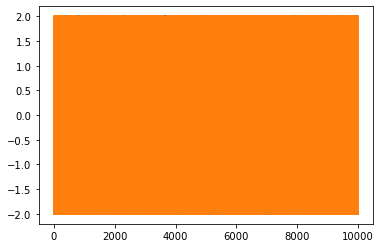

1117.7925233840942


In [10]:
from ruster_linear import Ruster_Linear
r = Ruster_Linear(path="C:\\Users\\Revive\\PycharmProjects\\Rust_Native_ML\\rust\\PerceptronLib\\target\\release\\PerceptronLib.dll")
t1 = time.time()

model_size = 192
model = r.create_linear_model(model_size)

model_np = r.npify(model, model_size+1)
# print(model_np)
print()

XF = [item for sublist in X for item in sublist]
YF = Y

losses = []
test_losses = []

for i in range(10000):
    rand_idx = random.randint(0, len(X)-1)
    rand_idx_test = random.randint(0, len(X_test)-1)
    predict = r.predict_linear_model_classification(model, X[rand_idx], (model_size+1))
    predict_test = r.predict_linear_model_classification(model, X_test[rand_idx_test], (model_size+1))
    
    losses.append(Y[rand_idx] - predict)
    test_losses.append(Y_test[rand_idx_test] - predict_test)
    
    r.train_rosenblatt_linear_model(model, XF, YF, model_size+1, 50, 0.003)
    
#     t2 = time.time()
#     print(t2 - t1)
#     print(f"Pred : {predict} Y : {Y[rand_idx]}")
#     print(f"Test : {predict_test} Y_test : {Y_test[rand_idx_test]}")
#     print()


plt.plot(losses)
plt.plot(test_losses)
plt.show()

t2 = time.time()
print(t2 - t1)

r.store_model(model, model_size+1, 181501)

r.destroy_linear_model(model, model_size)

In [11]:
from ruster_linear import Ruster_Linear
r = Ruster_Linear(path="C:\\Users\\Revive\\PycharmProjects\\Rust_Native_ML\\rust\\PerceptronLib\\target\\release\\PerceptronLib.dll")
mod_loaded = r.load_model(181501)
model_size = 192

accurates = 0
accurates_test = 0
for i in range(len(X)):
    predict = r.predict_linear_model_classification(mod_loaded, X[i], (model_size+1))
    if Y[i] - predict == 0:
        accurates += 1
        
for i in range(len(X_test)):
    predict_test = r.predict_linear_model_classification(mod_loaded, X[i], (model_size+1))
    if Y_test[i] - predict_test == 0:
        accurates_test += 1
        
print(f"Accuracy : {accurates} / {len(Y)}")
print(f"{round(accurates/len(Y)*100, 1)}%")
print() 
print(f"Test accuracy : {accurates_test} / {len(Y_test)}")
print(f"{round(accurates_test/len(Y_test)*100, 1)}%")
print()

r.destroy_linear_model(mod_loaded, model_size+1)

Accuracy : 3620 / 4528
79.9%

Test accuracy : 128 / 240
53.3%

